In [1]:
#Importing libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Get the data


In [2]:
telcom = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Initial Analysis


In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**Pandas didn’t detect all of the values in the ‘TotalCharges’ column to be float64 type, so we probably have some non-numeric data in the column.**

In [4]:
# convert all TotalCharges to numeric and set the invalid parsings/errors as NaN
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors = 'coerce')

# check the rows which have NaN in the TotalCharges column
telcom.loc[telcom['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [5]:
# we get 11 rows in the result , all of which have tenure =0
# Decision making - We can either drop these rows (as they are useless) or set the TotalCharges values to be 0. 
# Lets drop the rows.
#dataset = dataset.dropna()
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]


In [6]:
# Converting SeniorCitizen from int to categorical 
telcom['SeniorCitizen']=pd.Categorical(telcom['SeniorCitizen'])

In [7]:
# Deleting the custumerID column, contains no useful information
del telcom["customerID"] 

In [8]:
telcom.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
# split the dataset into numeric and objects to facilitate the analysis:

numerics = ['float64', 'int64']
numeric_ds = telcom.select_dtypes(include=numerics)
objects_ds = telcom.select_dtypes(exclude=numerics)

In [10]:
numeric_ds.describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [12]:
telcom.groupby('Churn').size()


Churn
No     5163
Yes    1869
dtype: int64

# 3. Graphical Analysis

### Target variable

We will look into our target variable distribution by using categorical plot function of seaborn

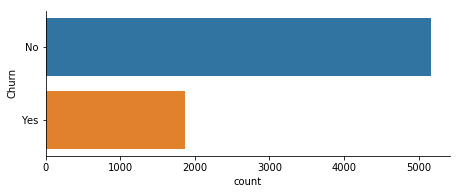

In [13]:
ax = sns.catplot(y="Churn", kind="count", data=telcom, height=2.6, aspect=2.5, orient='h')


We have a slightly unbalanced target:
Churn: No - 72.4%
Churn: Yes - 27.6%

### Numerical variables

In this part we will look into our numerical variables, how they are distributed, how they relate with each other and how they can help us to predict the ‘Churn’ variable.

There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the **seaborn kdeplot function.**

/Users/sgoyal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


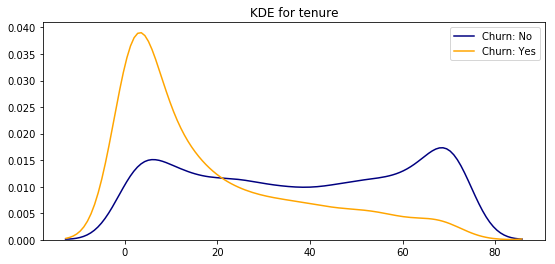

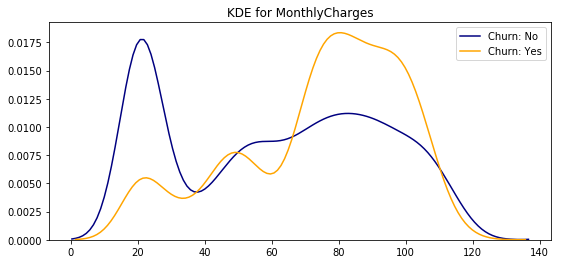

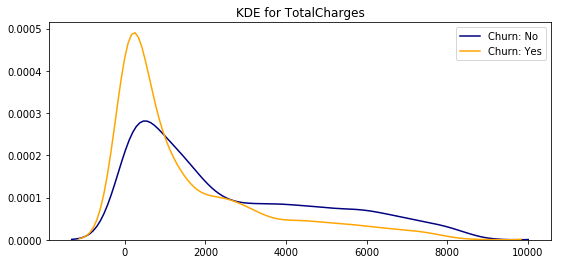

In [14]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telcom[telcom['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(telcom[telcom['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can **conclude** that:

* Recent clients are more likely to churn
* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features

We can come to the same conclusions when we use **scatter plots**



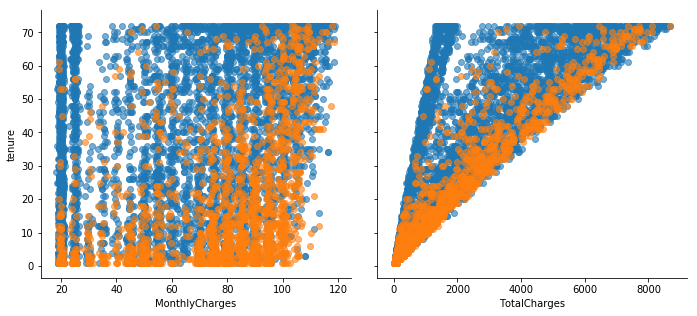

In [15]:
g = sns.PairGrid(telcom, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

### Categorical variables

This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

#### Partner and dependents


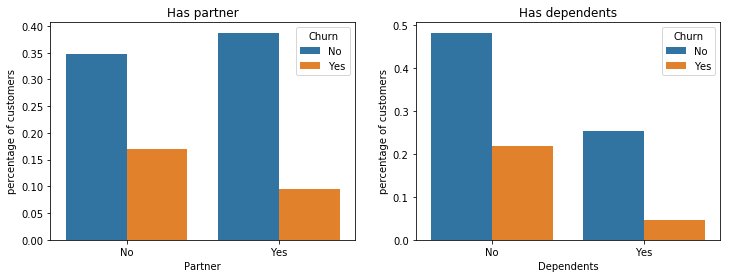

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = telcom.groupby('Partner')["Churn"].value_counts()/len(telcom)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telcom.groupby('Dependents')["Churn"].value_counts()/len(telcom)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

From the plots above we can **conclude** that:
* Customers that doesn't have partners are more likely to churn
* Customers without dependents are also more likely to churn

#### Contract and Payment

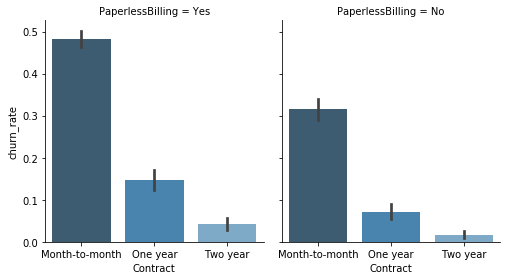

In [17]:
telcom['churn_rate'] = telcom['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telcom, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

In [18]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = telcom.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(telcom)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

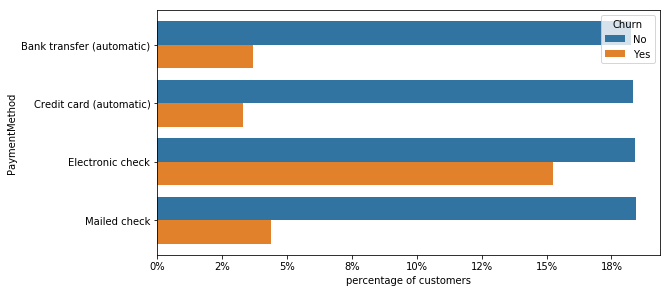

In [19]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few **observations**:

* Customers with paperless billing are more probable to churn
* The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates
* One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn.

 These observations are important for when we design the retention campaigns so that we know where we can focus.

####  plot all categorical variables as a bar plot

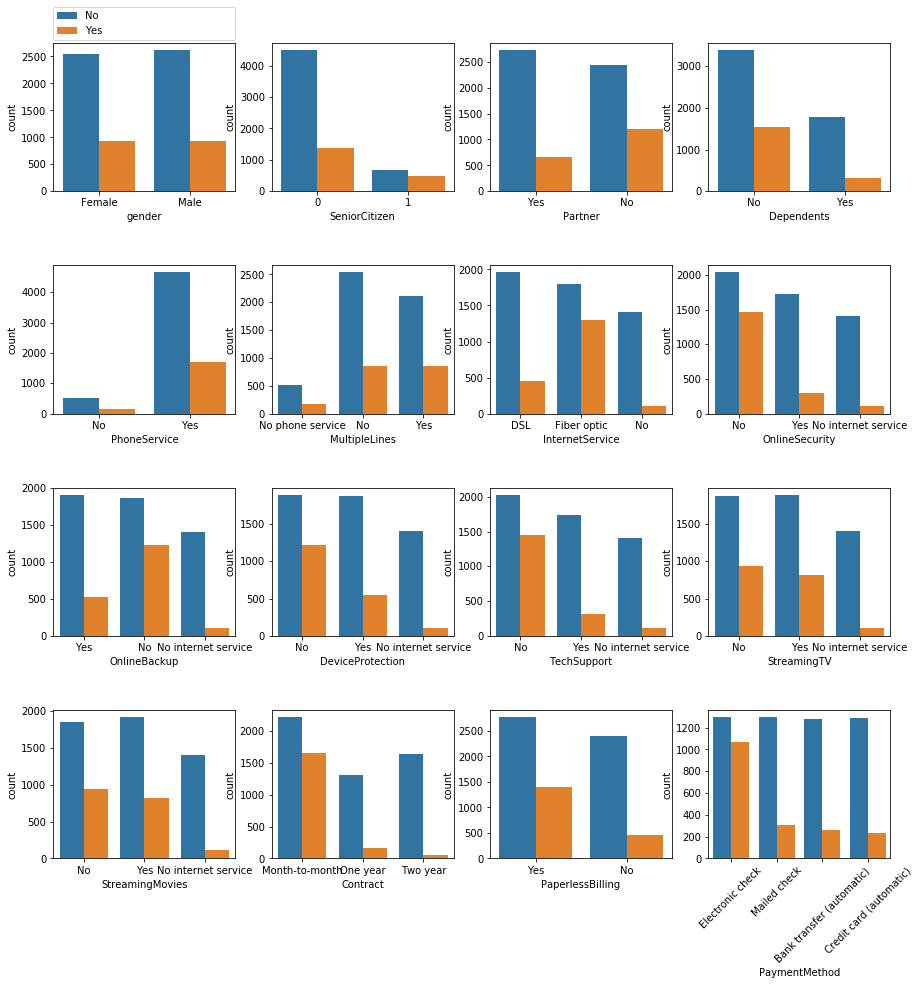

In [20]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

Now we have a better picture of the variables that are more important to us, for example, having Month-to-month contract is a strong indicator if the client might leave soon, so is the Electronic check payment method, being a senior citizen on the other hand is a good predictor but only represents a small amount of the companies clients so you might prefer to focus on the variables that delivers the best results first before tackling it.

# 4. Machine Learning Models


We will use Logistic Regression, Decision Tree, Random Forest and SVM

# 5. Performance Evaluation


In [21]:
## divide dataset into train and test datasets

from sklearn.model_selection import train_test_split

y = telcom['Churn'].values
X = telcom.drop(columns = ['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=959543)

In [22]:
## get the predictions
## 1. 100% correct predictions = y_pred_test1 = y_test
## 2. someone always predicting that there is no churn

y_pred_test1 = y_test

import numpy as np
a = np.empty(y_test.size, dtype='object')
a.fill('No')

y_pred_test2 = pd.DataFrame(a)

In [23]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, y_pred_test1))

1.0


In [24]:
print (metrics.accuracy_score(y_test, y_pred_test2))

0.7374407582938388


## Confusion Metrics

In [25]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_test1)
df_cm1 = pd.DataFrame(cm1)

cm2 = confusion_matrix(y_test, y_pred_test2)
df_cm2 = pd.DataFrame(cm2)


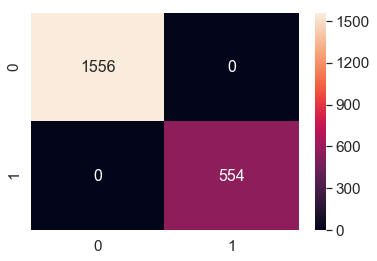

In [33]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm1, annot=True,annot_kws={"size": 16}, fmt='g')# font size

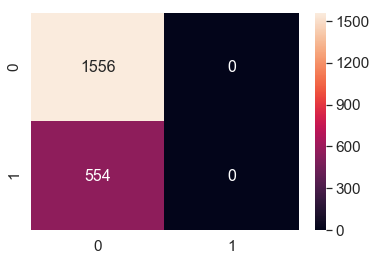

In [34]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm2, annot=True,annot_kws={"size": 16}, fmt='g')

## Confusion Metrics with labels

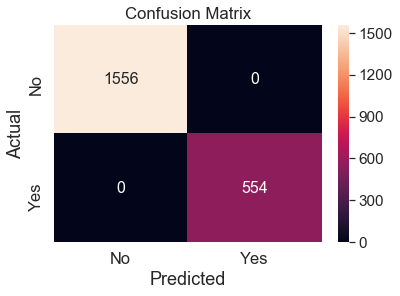

In [32]:
ax= plt.subplot()

classNames = ['No', 'Yes']

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm1, annot=True, xticklabels=classNames, yticklabels=classNames, annot_kws={"size": 16}, fmt='g')

ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 

## Recall and precision

In [36]:
from sklearn.metrics import precision_score,recall_score


# precision = tp / (tp + fp)


# true positive - churn, predicted as 'churn'
# true negative - no churn, predicted as 'no churn'
# false positive - no churn, predicted as 'churn'
# false negative - churn, predicted as 'no churn'

# recall = tp / (tp + fn)

precision1 = precision_score(y_test, y_pred_test1, labels = ['Yes'], average='micro')
precision2 = precision_score(y_test, y_pred_test2, labels = ['Yes'], average='micro')

recallscore1 = recall_score(y_test, y_pred_test1, labels = ['Yes'], average='micro')
recallscore2 = recall_score(y_test, y_pred_test2, labels = ['Yes'], average='micro')

data = [['1st model', precision1, recallscore1], ['2nd model (all no)', precision2, recallscore2]] 


df = pd.DataFrame(data, columns = ['Model', 'Precision', 'Recall'])
df

/Users/sgoyal/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Precision,Recall
0,1st model,1.0,1.0
1,2nd model (all no),0.0,0.0
